# Manipuler une image grâce au code: partie 1

## Du pixel aux images - 32M7138

*Printemps 2024 - Université de Genève*

*Adrien Jeanrenaud (adrien.jeanrenaud@unige.ch)*

<div class="alert alert-block alert-info">
<b>Manipulations partie 1</b> : jusque là nous avons vu les bases d'une images numérique - matrices et couleurs. 
    <br>À partir de maintenant, il s'agira de manipuler une image. Les manipulation permettent d'extraire de l'information, de "normaliser" l'image, voire de la modifier. 
    <br>Dans un premier temps, nous allons voir:
</div>

## **Plan du cours**

> **Indexation: les bases**
> * L'image à 1D: rappel des listes
> * L'image en valeurs de gris: 2D
> * 3D: les images couleurs

> **Créer une image: un bon exercice d'indexation**
> * Définir un canveas
> * Peindre des formes
> * Détourer sur une image

> **Manipuler avec l'indexation**
> * Recadrer
> * Modifier les dimensions
> * Modifier les couleurs
> * Tout ça pour?

In [1]:
# importer les librairies nécessaires

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

## **1. Indexation: les bases**

Jusqu'ici nous avons déjà utilisé l'indexation. Ce type de manipulation permets de nous déplacer sur une image, de cibler une dimensions et d'autres choses que nous verrons pas la suite.

### L'image à 1D: rappel des listes

Une image à 1D s'apparente à une liste. On a déjà vu les listes, alors faisons un petit rappel

In [2]:
# Une matrice à 1D
# La fonction np.array() permet de créer un tableau (array)

a = np.array([0,1,2,3,4,5,6,7,8,9])
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
# On peut vérifier les dimensions de notre matrice grâce à la fonction "shape"

print(a.shape)

(10,)


In [4]:
# Pour accéder à une valeur on utilise les [] pour déterminer une position (et non la valeur en elle-même!)

a[1]

1

In [5]:
# Mais en Python, la première position commence à 0

a[0]

0

In [6]:
# On peut aussi prendre plusieurs valeurs
# a[début:fin[ (non compris)

a[0:4]

array([0, 1, 2, 3])

In [7]:
# On peut donner un ensemble après une certaine position
# a[début: jusqu'à la fin] (compris)

a[4:]

array([4, 5, 6, 7, 8, 9])

In [8]:
# On peut donner un ensemble jusqu'à une certaine position
# a[depuis le début: fin[ (non compris)

a[:4]

array([0, 1, 2, 3])

In [9]:
# On peut partir depuis la dernière position
# a[début: moins les X dernières valeurs] 

a[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
# On peut donner un ensemble par la négative
# a[les X dernières valeurs:] 

a[-3:]

array([7, 8, 9])

In [11]:
# On peut même demander des ensembles plus spécifiques, par exemple prendre une valeur sur deux
# a[début inclu: fin inclu: pas entre les valeurs] 

a[ : :2]

array([0, 2, 4, 6, 8])

### L'image en valeurs de gris: 2D

Sur une image à deux dimensions, l'indexation permet d'acceder aux valeurs du tableau en se déplaçant sur la hauteur et la largeur, entre lignes et colonnes.

In [12]:
# Créer une image 2D

b = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [13]:
# Est-ce bien une matrice 2D?

print(b.shape)

(4, 3)


In [14]:
# Si l'on part de la logique à 1D
# un [] permet d'accéder à la ligne

b[0]

array([0, 1, 2])

In [15]:
# Accéder à plusieurs lignes

b[0:2]

array([[0, 1, 2],
       [3, 4, 5]])

In [16]:
# L'utilisation de la virgule permet de passer à une autre dimension
# Accéder à la colonne

b[:,0]

array([0, 3, 6, 9])

In [17]:
# Accéder à plusieurs colonnes

b[:,0:2]

array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10]])

In [18]:
# Accéder à plusieurs valeurs sur la ligne
# b[ligne, début colonne:fin] 

b[0,1:3]

array([1, 2])

In [19]:
# Accéder à plusieurs valeurs sur plusieurs lignes
# b[ligne départ:ligne arrivée non-incluse, début colonne: fin non incluse] 

b[0:2,1:3]

array([[1, 2],
       [4, 5]])

In [20]:
# On peut également utiliser le pas 
# ici on séléctionne une ligne sur deux et une colonne sur deux 

b[: :2,: :2]

array([[0, 2],
       [6, 8]])

### 3D: les images couleurs

L'intérêt de l'indexation d'une image à 3D est l'accès aux valeurs qui, dans le troisième dimension, forment la couleur.

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[255   0 255]
  [  0 255 255]
  [255 255   0]]]


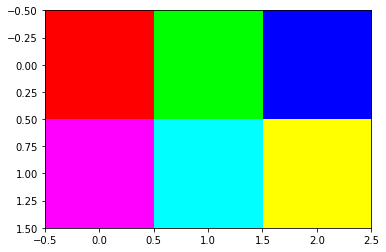

In [21]:
c = np.array([[[255,0,0],
               [0,255,0],
               [0,0,255]],
              [[255,0,255],
               [0,255,255],
               [255,255,0]]])
print(c)

plt.imshow(c)
plt.show()

In [22]:
# Quelles dimensions?

print(c.shape)

(2, 3, 3)


In [23]:
# Si l'on part de la logique à 1D
# un [] permet d'accéder à la ligne

c[0]

array([[255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255]])

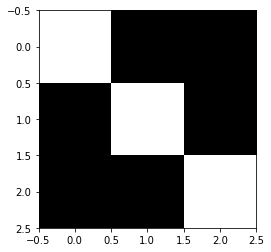

In [24]:
# De la ligne en image couleur à l'image en valeurs de gris

plt.imshow(c[0], cmap="gray")
plt.show()

In [25]:
# Sur cette ligne on peut accéder aux deux premières valeurs par exemple

c[0,:2]

array([[255,   0,   0],
       [  0, 255,   0]])

In [26]:
# Et sur cette ligne à deux valeurs on peut accéder à la première dimension (au rouge par exemple)

c[0,:3, 0]

array([255,   0,   0])

In [27]:
# On prend la première colonne

c[:,:1,:]

array([[[255,   0,   0]],

       [[255,   0, 255]]])

In [28]:
# On peut aussi simplement prendre la "couche" qui contient la couleur vert

c[:,:, 1]

array([[  0, 255,   0],
       [  0, 255, 255]])

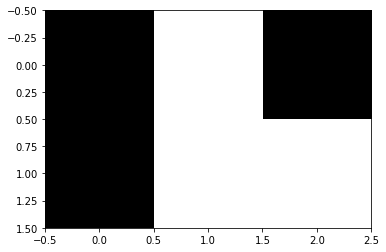

In [29]:
plt.imshow(c[:,:, 1], cmap="gray")
plt.show()

## **2. Créer une image**

Avec Python il est possible de créer des une image ainsi qu'y insérer des formes. C'est un bon exercice d'indexation.

### Définir un canevas

D'abord il faut créer une toile, un canevas vide

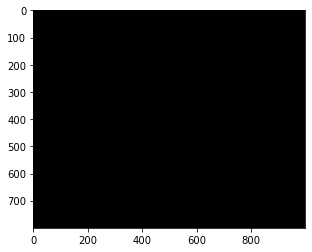

In [30]:
# on crée une matrice remplie de 0, de 800 par 1000, avec trois canaux

canevas = np.zeros((800, 1000, 3), dtype="uint8")
plt.imshow(canevas, cmap="gray")
plt.show()

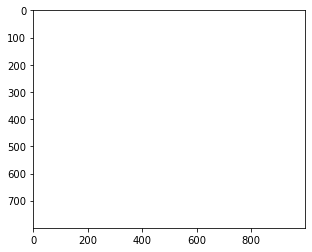

In [31]:
# On peut aussi créer une toile blanche
# il suffit de mettre toutes les valeurs à 255

canevas_blanc = np.zeros((800, 1000, 3), dtype="uint8")
canevas_blanc.fill(255)
plt.imshow(canevas_blanc, cmap="gray")
plt.show()

### Peindre des formes

À partir d'une toile vide on peut peindre des formes de base: ligne, rectangle, cercle

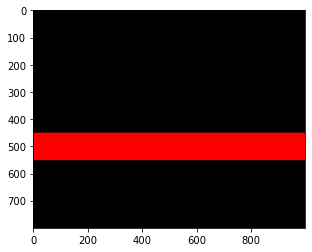

In [32]:
# Tracer une ligne, pas à pas

start = (0,500) #début de la ligne
end = (1000, 500)#fin de la ligne
couleur = (255, 0, 0) #couleur de la ligne en RGB
largeur = 100  #largeur de la ligne en pixels

canevas = cv2.line(canevas, start, end, couleur, largeur)
plt.imshow(canevas)
plt.show()

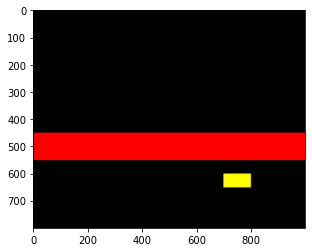

In [33]:
# Tracer un rectangle, pas à pas

start2 = (700,600) #début en haut à gauche
end2 = (800, 650)#fin en bas à droite
couleur2 = (255, 255, 0) #couleur de la ligne en RGB
largeur2 = -1  #taille du trait

canevas = cv2.rectangle(canevas, start2, end2, couleur2, largeur2)
plt.imshow(canevas)
plt.show()

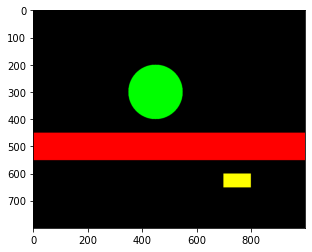

In [34]:
# Tracer un cercle, pas à pas

centre = (450, 300) # Centre du cercle
r = 100 #rayon du cercle
couleur3 = (0, 255, 0) #couleur en RGB
largeur3 = -1 #largeur du contour en pixels

canevas = cv2.circle(canevas, centre, r, couleur3, largeur3)
plt.imshow(canevas)
plt.show()

**Dans l'idée d'automatiser la tâche, on peut s'aider des dimensions de l'image**

In [35]:
# Faisons le drapeau des Pays Bas par exemple
# d'abord les dimensions de notre image

canevas_blanc.shape

(800, 1000, 3)

In [36]:
#indexer les valeurs

canevas_blanc.shape[0]

800

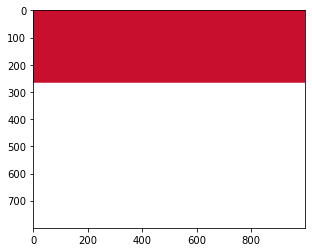

In [37]:
# faisons la partie supérieur en rouge

start_r = (0,0) #début du rectangle en haut à droite
end_r = (canevas_blanc.shape[1], canevas_blanc.shape[0]//3)#fin de la ligne
couleur_r = (200,16,46) #couleur RGB #https://flagcolor.com/netherlands-flag-colors/
largeur_r = -1  # remplir la forme

canevas_blanc = cv2.rectangle(canevas_blanc, start_r, end_r, couleur_r, largeur_r)
plt.imshow(canevas_blanc)
plt.show()

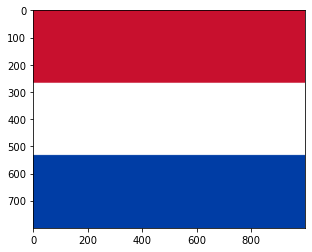

In [38]:
# faisons la partie inférieur en rouge

start_b = (0,(canevas_blanc.shape[0]//3)*2) #début du rectangle en haut à droite
end_b = (canevas_blanc.shape[1], canevas_blanc.shape[0])#fin de la ligne
couleur_b = (0,61,165) #couleur RGB #https://flagcolor.com/netherlands-flag-colors/
largeur_b = -1  # remplir la forme

canevas_blanc = cv2.rectangle(canevas_blanc, start_b, end_b, couleur_b, largeur_b)
plt.imshow(canevas_blanc)
plt.show()

<div class="alert alert-block alert-warning">
<b>Exercice</b>: faites le drapeau de l'Italie, du Japon et de la Suisse.</div>

In [39]:
def italie(longueur):                                                  # la variable longueur doit être un entier
    
    if isinstance(longueur, int) is False:                             # on vérifie que la longueur est un entier
        print('La valeur d´attribution doit être entière')
    else:   
        largeur = longueur*2//3                                            # on définit la largeur en fonction de la largeur, respectant le rapport de 2/3.
            
        canevas_blanc = np.zeros((largeur, longueur, 3), dtype="uint8")    # on crée un canevas blanc selon les dimensions
    
        couleur1 = (0, 146, 70)                                            # on définit les couleurs du drapeau de l'Italie (vert fougère, blanc éclatant, cramoisi)
        couleur2 = (241, 242, 241)
        couleur3 = (206, 43, 55)
    
        start1 = (0,0)                      # début du rectangle en haut à gauche
        start2 = (longueur//3,0)            # premier tiers du rectangle à gauche
        start3 = (longueur*2//3,0)          # deuxième tiers du rectangle à gauche
    
        end1 = (longueur//3, largeur)       # fin du rectangle en bas à droite
        end2 = (longueur*2//3, largeur)     # fin du rectangle en bas à droite
        end3 = (longueur, largeur)          # fin du rectangle en bas à droite
    
        largeur1 = -1                       # la largeur mise à -1, couleur unie
        largeur2 = -1                       # la largeur mise à -1, couleur unie
        largeur3 = -1                       # la largeur mise à -1, couleur unie
    
        canevas_vert = cv2.rectangle(canevas_blanc, start1, end1, couleur1, largeur1)        # on crée le rectangle vert
        canevas_vert_blanc = cv2.rectangle(canevas_vert, start2, end2, couleur2, largeur2)   # on crée le rectangle blanc
        drapeau = cv2.rectangle(canevas_vert_blanc, start3, end3, couleur3, largeur3)        # on crée le rectangle rouge
    
        return plt.imshow(drapeau), plt.show()
    
    

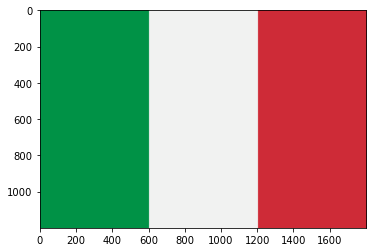

(<matplotlib.image.AxesImage at 0x7f8589590730>, None)

In [41]:
italie(1800)

In [42]:
def japon(longueur):

    if isinstance(longueur, int) is False:                                 # on vérifie que la longueur est un entier
        print('La valeur d´attribution doit être entière')
    else:   
        largeur = longueur*7//10                                           # on définit la largeur en fonction de la largeur, respectant le rapport de 7/10.
            
        canevas_blanc = np.zeros((largeur, longueur, 3), dtype="uint8")    # on crée un canevas blanc selon les dimensions
    
        couleur1 = (255, 255, 255)                                         # on définit les couleurs du drapeau du Japon
        couleur2 = (188, 0, 45)
        
        centre = (longueur//2, largeur//2)
        
        r = largeur*3//10                   # calcul du rayon du cercle
    
        start1 = (0,0)
        end1 = (longueur, largeur)        
 
        largeur1 = -1                       # la largeur mise à -1, couleur unie
        largeur2 = -1                       # la largeur mise à -1, couleur unie
    
        canevas = cv2.rectangle(canevas_blanc, start1, end1, couleur1, largeur1)        # on crée un rectangle blanc
        drapeau = cv2.circle(canevas, centre, r, couleur2, largeur2)                    # on crée un cercle rouge
    
        return plt.imshow(drapeau), plt.show()

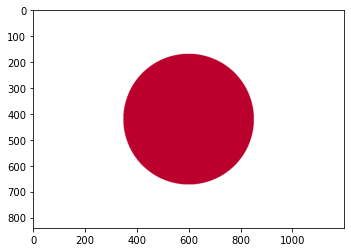

(<matplotlib.image.AxesImage at 0x7f85692b6550>, None)

In [43]:
japon(1200)

In [44]:
def suisse(longueur):

    if isinstance(longueur, int) is False:                                # on vérifie que la longueur est un entier
        print('La valeur d´attribution doit être entière')
    else:   
        largeur = longueur                                                # on définit la largeur en fonction de la largeur, respectant le rapport de 1:1.
            
        canevas_blanc = np.zeros((largeur, longueur, 3), dtype="uint8")   # on crée un canevas blanc selon les dimensions
    
        couleur1 = (225, 26, 39)                                          # on définit les couleurs du drapeau de la Suisse
        couleur2 = (255, 255, 255)

        start1 = (0,0)
        start2 = (longueur*13//32, longueur*6//32)                        # on calcule les extrémités des branches de la croix, sachant que la proportion est de 6 pour 7 entre la largeur et la longueur d'une extrémité
        start3 = (longueur*6//32, longueur*13//32)
        
        end1 = (longueur, longueur)
        end2 = (longueur*19//32, longueur*26//32)
        end3 = (longueur*26//32, longueur*19//32)
 
        largeur1 = -1                       # la largeur mise à -1, couleur unie
        largeur2 = -1                       # la largeur mise à -1, couleur unie
    
        carre = cv2.rectangle(canevas_blanc, start1, end1, couleur1, largeur1)        # on crée un carré rouge
        canevas = cv2.rectangle(carre, start2, end2, couleur2, largeur2)              # on crée une première branche
        drapeau = cv2.rectangle(canevas, start3, end3, couleur2, largeur2)            # on crée une seconde branche
    
        return plt.imshow(drapeau), plt.show()

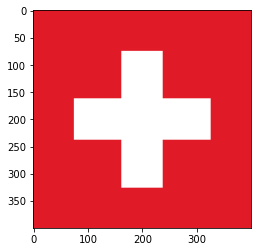

(<matplotlib.image.AxesImage at 0x7f8568fbf100>, None)

In [45]:
suisse(400)

### Exemple d'application : détourer sur une image

Détourer une partie de l'image détectée au préalable : l'exemple de la détection de visage

In [48]:
# télécharger une image

import requests 

DownURL = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.bluebird-electric.net%2Facademia%2Facademia_pictures%2FUniversity_of_Geneva_Universite_de_Geneve_Switzerland_Planet_Solar.jpg&f=1&nofb=1&ipt=47cb55e9bf396b35de8f272546914dbe02979fdd2163fd7e2e15601bec35314c&ipo=images" # choix de l'URL
img_data = requests.get(DownURL).content # télécharger
with open('unige.jpg', 'wb') as handler: # définir le fichier et son chemin
    handler.write(img_data) # enregistrer l'image

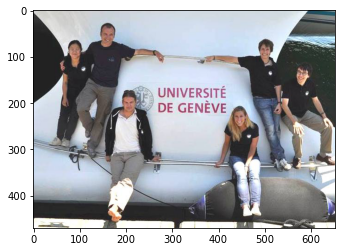

In [49]:
# import notre image

path = "unige.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
DownURL = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml"
data = requests.get(DownURL).content # télécharger
with open('haarcascade_frontalface_alt.xml', 'wb') as handler: # définir le fichier et son chemin
    handler.write(data)

In [51]:
# Appliquer un algorithme simple
# https://towardsdatascience.com/viola-jones-algorithm-and-haar-cascade-classifier-ee3bfb19f7d8

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml") #https://github.com/opencv/opencv/tree/master/data/haarcascades
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [53]:
detected_faces

array([[145,  39,  36,  36],
       [ 76,  75,  28,  28],
       [560, 120,  38,  38],
       [192, 187,  31,  31],
       [429, 218,  31,  31]], dtype=int32)

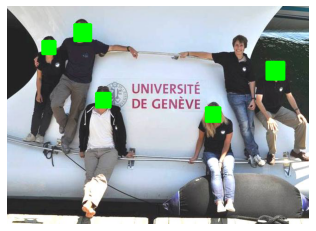

In [54]:
# Dessiner les lignes

for (column, row, width, height) in detected_faces:
    image = cv2.rectangle(image,(column, row),(column + width, row + height),(0, 255, 0),-1)
plt.imshow(image)
plt.axis("off")
plt.show()

## **3. Manipuler avec l'indexation**

### Recadrer

L'indexation permet de recadrer une image. Cette tâche permet d'extraire des parties de l'image, par exemple.

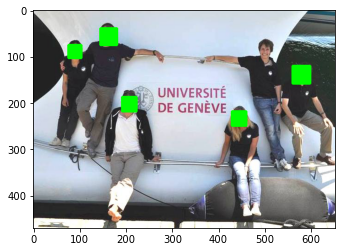

In [55]:
# import notre image

plt.imshow(image)
plt.show()

In [56]:
# Les infos de la détection

path = "unige.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detected_faces

array([[145,  39,  36,  36],
       [ 76,  75,  28,  28],
       [560, 120,  38,  38],
       [192, 187,  31,  31],
       [429, 218,  31,  31]], dtype=int32)

In [57]:
# Combien de têtes ?

len(detected_faces)

5

In [58]:
# les informations pour recadrer

d1 = detected_faces[0][0] # début de la ligne
d2 = detected_faces[0][1] # début de la colonne
f1 =  detected_faces[0][0] + detected_faces[0][2] # fin de la ligne
f2 = detected_faces[0][1] + detected_faces[0][3] # fin de la colonne
print(d1, d2, f1, f2)

145 39 181 75


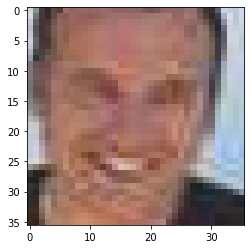

In [60]:
# recadrer avec les coordonnées

image_rec = image[d2:f2, d1:f1]
plt.imshow(image_rec)
plt.show()

In [61]:
# Sauvegarder une image

image_save = cv2.cvtColor(image_rec, cv2.COLOR_RGB2BGR) #on change les canaux à nouveau
cv2.imwrite('image_visage1.jpg',image_save)

True

### Supplément : modifier les dimensions

Lorsqu'on manipule des images, on a parfois besoins de changer leur format en gardant ou non les dimensions

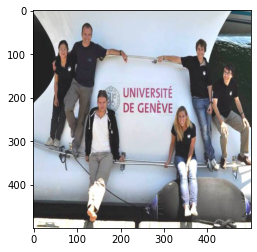

In [84]:
# Redimensionner 
# Par exemple une image de 500 sur 500

l = 500
h = 500
dim = (l, h)
redim_image = cv2.resize(image, dim)
plt.imshow(redim_image)
plt.show()

**Dans Open CV il existe plusieurs manières de redimensionner :**

* INTER_AREA = utilise le pixel par rapport à sa zone pour le réechantillonage, pour la réduction de taille
* INTER_CUBIC = prend le moyenne des poids des 16 pixels autour d'un pixel pour réechantilloner
* INTER_LINEAR = similaire au INTER_CUBIC, avec un voisinage plus faible
* INTER_NEAREST = la méthode la plus simple

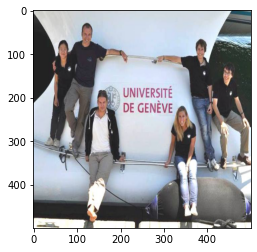

In [85]:
# Redimensionner 
# Par exemple une image de 600 sur 600

l = 500
h = 500
dim = (l, h)
redim_image = cv2.resize(image, dim, interpolation= cv2.INTER_AREA)
plt.imshow(redim_image)
plt.show()

(470, 652, 3)
(1500, 2080, 3)


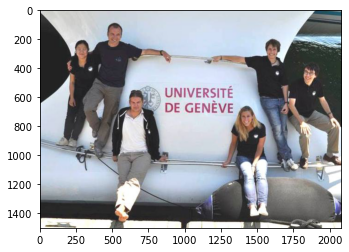

In [86]:
# Redimensionner 
# On peut aussi redimensionner en gardant les proportions, de la hauteur ou de la largeur
# exemple, une hateur de 500

(h, l) = image.shape[:2]
newh = 1500
ratio = newh/ float(h)
newdim = (int(l * ratio), newh)
redim_image = cv2.resize(image, newdim)
print(image.shape)
print(redim_image.shape)
plt.imshow(redim_image)
plt.show()

### Tout ça pour? 

Un exercice!

<div class="alert alert-block alert-warning">
<b>Exercice</b>: à partir du code que vous avez produit la semaine dernière. Créez une fonction qui télécharge une image, détecte les visage (en disant combien vous en avez) et découpe les visage.</div>